### **MA-INF4325 - Lab Data Science in Practice - Spatio Temporal Data Analytics**

Supervisor : PROF. DR. ELENA DEMIDOVA

Assistant  : ALISHIBA DSOUZA        
                        
UNIVERSITY OF BONN


**Lab Topic  is Prediction of Covid-19 Spread**



*   219 Countries and Territories around the world have reported a total of 122,435,351 confirmed cases of the coronavirus(COVID-19) and a death toll of 2,704,440 deaths.
*   The aim of this project is to predict the spread of this pandemic in the countries which are highly affected by this virus. And also identifying the factors affecting the spread like government policies, healthcare systems, etc in such difficult times.
*   We will work as per below guidelines to achieve the results:
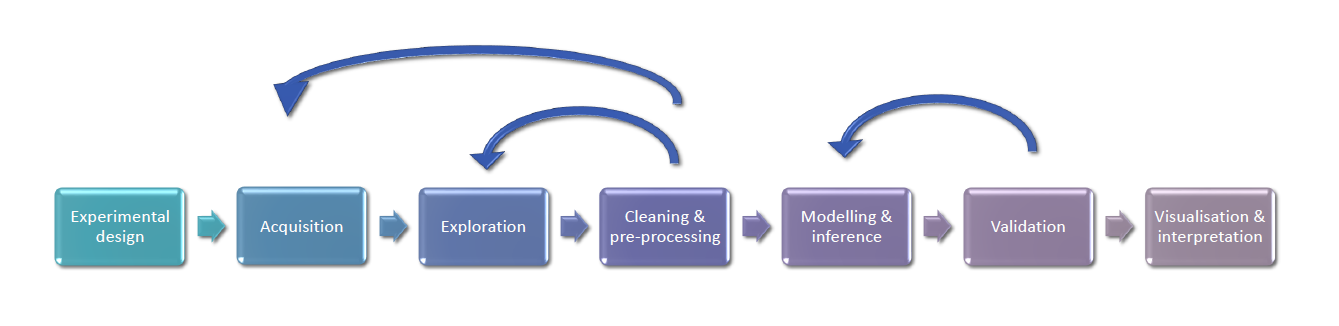

**SECTION 2 : EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis invoves analyzing data, identifying patterns in the data, identifying distributions with the help of visualization techniques that help us to formulate our assumption or hypothesis.

Based on this hypothesis, we train our model and use it to make predictions.

**TOPICS INVOLVED IN EXPLORETORY DATA ANALYSIS(EDA)**

*   Checking Statistical Information
*   Checking Datatypes of Time Series variables
*   Outlier Treatment
*   Distribution and Spread of Feature Values





In [ ]:
# IMPORTING LIBRARIES
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# MATHEMATICS
import numpy as np

# VISUALIZATIONS
import matplotlib.pyplot as plt
import seaborn as sns

# MACHINE LEARNING
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


In [ ]:
# To display all the available columns and rows in the output :

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [ ]:
# READING THE DATASET

data = pd.read_csv('Final_Covid_Dataset.csv')                                         
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)              # To drop a column named 'unnamed:0'

# BASIC INFORMATION ABOUT DATASET:

print('\n Dimensions of the Dataset:', data.shape)                       # No. of records(rows) * No. of features(columns)
print('\n First Few rows are: \n', data.head())                          # Shows what first few rows looks like
print('\n Features of the dataset are: \n', data.columns)                # Columns in the dataset
print('\n Unique data for countries for unique days: \n ', data['country_name'].value_counts())   # No. of days of records for each country


 Dimensions of the Dataset: (34111, 69)

 First Few rows are: 
              date          country_name  mobility_retail_and_recreation  \
0  2/15/2020 0:00  United Arab Emirates                             0.0   
1  2/16/2020 0:00  United Arab Emirates                             1.0   
2  2/17/2020 0:00  United Arab Emirates                            -1.0   
3  2/18/2020 0:00  United Arab Emirates                            -2.0   
4  2/19/2020 0:00  United Arab Emirates                            -2.0   

   mobility_grocery_and_pharmacy  mobility_parks  mobility_transit_stations  \
0                            4.0             5.0                        0.0   
1                            4.0             4.0                        1.0   
2                            1.0             5.0                        1.0   
3                            1.0             5.0                        0.0   
4                            0.0             4.0                       -1.0   

   mobili

**Checking Statistical Information** 

In [ ]:
# NULL VALUE CHECK
print('Null values from each column : \n',data.isnull().sum())                  # check the null values in any of the columns.

# STATISTICAL INFORMATION
print('\n Datatype of each feature from the dataset \n',data.info())          # gives us the information about the datatypes of each feature.
print('\n Some Statistical Deatils about the dataset: \n ', data.describe())  # gives us the statistical details about the dataset.


Null values from each column : 
 date                                  0
country_name                          0
mobility_retail_and_recreation        0
mobility_grocery_and_pharmacy         0
mobility_parks                        0
mobility_transit_stations             0
mobility_workplaces                   0
mobility_residential                  0
population                            0
population_male                       0
population_female                     0
rural_population                      0
urban_population                      0
population_density                    0
human_development_index               0
population_age_00_09                  0
population_age_10_19                  0
population_age_20_29                  0
population_age_30_39                  0
population_age_40_49                  0
population_age_50_59                  0
population_age_60_69                  0
population_age_70_79                  0
population_age_80_89                  0
populat

**Checking and Correcting Datatypes of Time Series variables**

In [ ]:
# Converting the datatype of 'date' variable to datetime64[ns]
data['date'] = pd.to_datetime(data['date'])

**Outlier Treatment**


 Shape of the dataset filtered on country "TURKEY" 
  (328, 69)


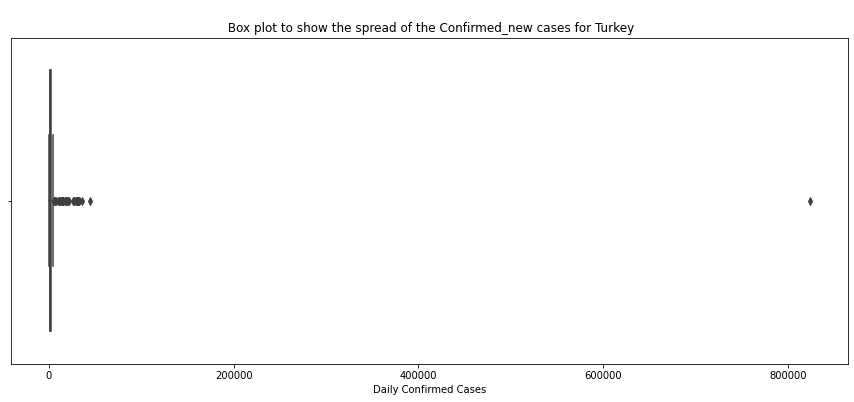

In [ ]:
# CHECKING OUTLIER FOR TURKEY
turkey_data = data[data['country_name'] == 'Turkey']
print('\n Shape of the dataset filtered on country "TURKEY" \n ',turkey_data.shape)

#PLOTTING
plt.rcParams["figure.figsize"] = [15,6]
sns.boxplot(turkey_data.Confirmed_New)
plt.title("\n Box plot to show the spread of the Confirmed_new cases for Turkey")
plt.xlabel("Daily Confirmed Cases")
plt.show()


In [ ]:
## FETCHING THE RECORD WHICH IS AN OUTLIER FOR TURKEY
print('\n Records for which "Confirmed_New" is higher than 800000 \n',turkey_data.loc[turkey_data.Confirmed_New > 800000])


 Records for which "Confirmed_New" is higher than 800000 
             date country_name  mobility_retail_and_recreation  \
31786 2020-12-10       Turkey                           -41.0   

       mobility_grocery_and_pharmacy  mobility_parks  \
31786                           10.0            -9.0   

       mobility_transit_stations  mobility_workplaces  mobility_residential  \
31786                      -26.0                -24.0                  12.0   

       population  population_male  population_female  rural_population  \
31786    82003882         41139980           40863902          20331797   

       urban_population  population_density  human_development_index  \
31786          63097818               106.2                     0.82   

       population_age_00_09  population_age_10_19  population_age_20_29  \
31786              12843906              12764690              12823598   

       population_age_30_39  population_age_40_49  population_age_50_59  \
31786          

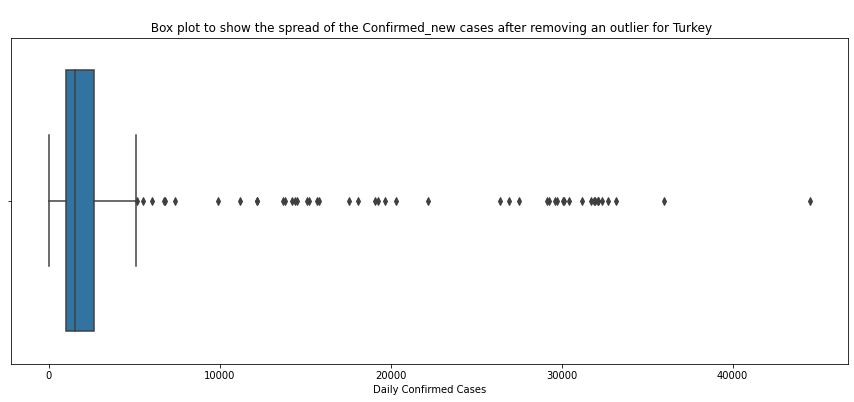

In [ ]:
# WE WOULD REMOVE THIS PARTICULAR RECORD AS IT IS AN OUTLIER: 
'''I have checked on https://www.worldometers.info/ 
the highest Confirmed cases reported per day for Turkey is around 40000.'''

data.drop(turkey_data[turkey_data.Confirmed_New > 800000].index, inplace = True)
turkey_data = data[data['country_name'] == 'Turkey']

#PLOTTING AFTER REMOVING THE OUTLIER
plt.rcParams["figure.figsize"] = [15,6]
sns.boxplot(turkey_data.Confirmed_New)
plt.title("\n Box plot to show the spread of the Confirmed_new cases after removing an outlier for Turkey")
plt.xlabel("Daily Confirmed Cases")
plt.show()


 Shape of the dataset filtered on country "FRANCE" 
  (328, 69)


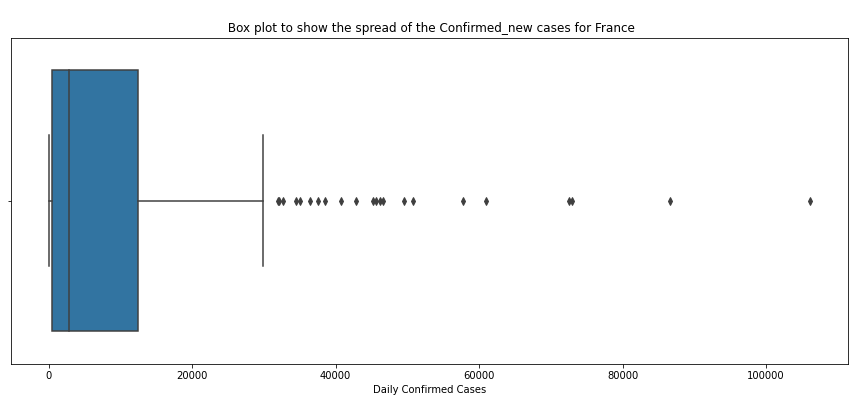

In [ ]:
# CHECKING OUTLIER FOR FRANCE
france_data = data[data['country_name'] == 'France']
print('\n Shape of the dataset filtered on country "FRANCE" \n ',france_data.shape)

plt.rcParams["figure.figsize"] = [15,6]
sns.boxplot(france_data.Confirmed_New)
plt.title("\n Box plot to show the spread of the Confirmed_new cases for France")
plt.xlabel("Daily Confirmed Cases")
plt.show()


In [ ]:
# FETCHING THE RECORD WHICH IS AN OUTLIER FOR FRANCE
print('\n Records for which "Confirmed_New" is higher than 800000 \n',france_data.loc[france_data.Confirmed_New > 100000])


 Records for which "Confirmed_New" is higher than 800000 
             date country_name  mobility_retail_and_recreation  \
11084 2020-11-02       France                           -52.0   

       mobility_grocery_and_pharmacy  mobility_parks  \
11084                          -13.0           -20.0   

       mobility_transit_stations  mobility_workplaces  mobility_residential  \
11084                      -42.0                -30.0                  13.0   

       population  population_male  population_female  rural_population  \
11084    67012883         32386507           34626376          12936523   

       urban_population  population_density  human_development_index  \
11084          54123364               105.6                    0.888   

       population_age_00_09  population_age_10_19  population_age_20_29  \
11084               7864258               8319867               7526449   

       population_age_30_39  population_age_40_49  population_age_50_59  \
11084          

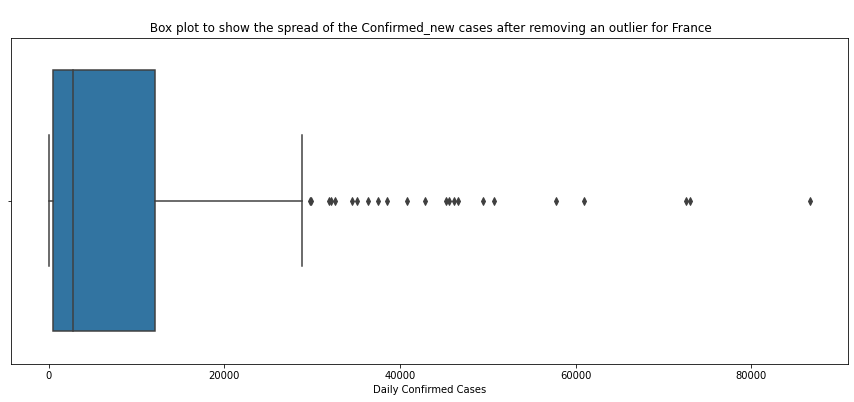

In [ ]:
# WE WOULD REMOVE THIS PARTICULAR RECORD - 
'''I have checked on https://www.worldometers.info/ 
the highest Confirmed cases reported per day for france is around 88000.'''

data.drop(france_data[france_data.Confirmed_New > 100000].index, inplace = True)
france_data = data[data['country_name'] == 'France']

#PLOTTING AFTER REMOVING THE OUTLIER
plt.rcParams["figure.figsize"] = [15,6]
sns.boxplot(france_data.Confirmed_New)
plt.title("\n Box plot to show the spread of the Confirmed_new cases after removing an outlier for France")
plt.xlabel("Daily Confirmed Cases")
plt.show()

Our aim of these research is to identify the spread of pandemic in the countries which are highly affected by Covid-19. 

And also to see the effects of preventive measures taken by Goverment and how it has affected the growth of the virus.

So, in order to answer above research questions, I would be dedicatedly working on the features that falls under Govt Response Category Variables.

The features falls under Government Response category are below:

Summary of a government's response to the events, including a stringency index.

1. school_closing	integer [0-3]	       Schools are closed
2. workplace_closing	integer [0-3]	    Workplaces are closed
3. cancel_public_events	integer [0-3]	   Public events have been cancelled
4. restrictions_on_gatherings	integer [0-3]	   Gatherings of non-household members are restricted
5. stay_at_home_requirements	integer [0-3]	   Self-quarantine at home is mandated for everyone
6. international_travel_controls	integer [0-3]	   International travel is restricted
7. testing_policy	integer [0-3]	    Country-wide COVID-19 testing policy 
8. stringency_index	double [0-100]	   Overall stringency index

In [ ]:
# I would be working on the following features.
govt_policies_columns = ['date','country_name','Confirmed_New','Recovered_New','Deaths_New','school_closing',
                  'workplace_closing','cancel_public_events','restrictions_on_gatherings',
                  'stay_at_home_requirements','international_travel_controls', 'testing_policy', 'stringency_index']

govt_response_policies_data = data[govt_policies_columns] 
print('\n Shape of the filtered data (variables including goverment policy data only)\n',govt_response_policies_data.shape)
print('\n First few rows of filtered data (variables including goverment policy data only) \n',govt_response_policies_data.head())


 Shape of the filtered data (variables including goverment policy data only)
 (34109, 13)

 First few rows of filtered data (variables including goverment policy data only) 
         date          country_name  Confirmed_New  Recovered_New  Deaths_New  \
0 2020-02-15  United Arab Emirates              8              3           0   
1 2020-02-16  United Arab Emirates              1              1           0   
2 2020-02-17  United Arab Emirates              0              0           0   
3 2020-02-18  United Arab Emirates              0              0           0   
4 2020-02-19  United Arab Emirates              0              0           0   

   school_closing  workplace_closing  cancel_public_events  \
0             0.0                0.0                   0.0   
1             0.0                0.0                   0.0   
2             0.0                0.0                   0.0   
3             0.0                0.0                   0.0   
4             0.0                

In [ ]:
# NOW WE WILL FIND OUT TOP COUNTRIES WHICH ARE MOSTLY AFFECTED BY THE PANDEMIC.

filt = govt_response_policies_data.groupby(['country_name'])                # grouping data by countries
confirmed_countrywise = filt['Confirmed_New'].sum()                         # summing confirmed cases groupwise

confirmed_countries = list(confirmed_countrywise.index)                   # Country names
confirmed_count_values = list(confirmed_countrywise.values)               # and their respective total confirmed cases count

country_count_dict = dict(zip(confirmed_countries,confirmed_count_values))
# print('\n Countries with their counts for total Confirmed cases \n ',country_count_dict)

sorted_country_count_dict = sorted(country_count_dict.items(), key=lambda kv: kv[1], reverse=True)    # Sorting the dict based on high Confirmed Cases
# print("\n Sorted dict for country - confirmed cases count",sorted_country_count_dict)

top_ten_countries = sorted_country_count_dict[:10]            # Taking only top 10 affected countries
# print(top_ten_countries[1:])

top_ten_countries_names = list()                              # Top 10 affected country names
top_ten_countries_count = list()                              # And their respective Confirmed cases count


# WE WILL REMOVE USA FROM ABOVE LIST AS WE ARE GOING TO ANALYSE IT SEPARATELY. 

for i in range(1,len(top_ten_countries)):                       # To omit USA for loop starting from 1                   
  top_ten_countries_names.append(top_ten_countries[i][0])
  top_ten_countries_count.append(top_ten_countries[i][1])

print('\n Top 10 country names \n',top_ten_countries_names)
print('\n Top 10 country count \n',top_ten_countries_count)


# Dataset only top 10 countries
top_ten_countries_data = govt_response_policies_data[govt_response_policies_data['country_name'].isin(top_ten_countries_names)]
unique_countries = top_ten_countries_data.country_name.unique()
print('\n Unique Country names within filtered data \n',unique_countries)




 Top 10 country names 
 ['India', 'Brazil', 'Russia', 'United Kingdom', 'France', 'Italy', 'Spain', 'Germany', 'Colombia']

 Top 10 country count 
 [10413417, 7961673, 3297833, 2898052, 2731803, 2220509, 2035310, 1886561, 1737347]

 Unique Country names within filtered data 
 ['Brazil' 'Colombia' 'Germany' 'Spain' 'France' 'United Kingdom' 'India'
 'Italy' 'Russia']


Text(0.5, 1.0, '\n Countries and spread of their Confirmed Cases (excluding USA)')

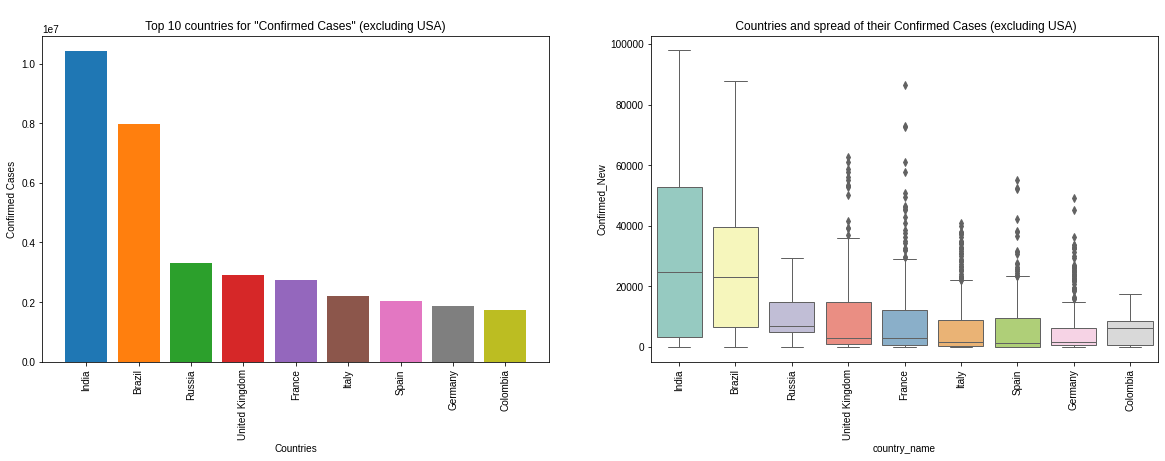

In [ ]:
# HERE WE WILL PLOT THEIR BAR AND BOX PLOTS RESPECTIVELY:
xindices = np.arange(len(top_ten_countries_names))

plt.rcParams["figure.figsize"] = [20,6]

# PLOTTING : BAR PLOT
plt.subplot(1,2,1)
plt.bar(xindices, height = top_ten_countries_count, tick_label = top_ten_countries_names, 
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'] )
plt.xlabel('Countries')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation = 90)
plt.title('\n Top 10 countries for "Confirmed Cases" (excluding USA) ')

# PLOTTING : BOX PLOT
plt.subplot(1,2,2)
plt.style.use('seaborn')
sns.boxplot(x=top_ten_countries_data.country_name, y=top_ten_countries_data.Confirmed_New, 
            data = top_ten_countries_data, palette = 'Set3', linewidth=1,
            order=['India', 'Brazil','Russia','United Kingdom','France','Italy','Spain','Germany','Colombia'],
            )
plt.xticks(rotation = 90)
plt.title('\n Countries and spread of their Confirmed Cases (excluding USA)') 


Now we want to check which country has the most difference between Confirmed and Recovered Cases.

In [ ]:
# HERE WE WILL SEE THE DIFFERENCE BETWEEN CONFIRMED AND RECOVERED CASES FOR TOP COUNTRIES:

# FOR CONFIRMED CASES :
top_ten_countries_confirmed_names = list()
top_ten_countries_confirmed_count = list()

for i in range(len(top_ten_countries)):
  top_ten_countries_confirmed_names.append(top_ten_countries[i][0])
  top_ten_countries_confirmed_count.append(top_ten_countries[i][1])

print('\n CONFIRMED CASES')
print(top_ten_countries_confirmed_names)
print(top_ten_countries_confirmed_count)

# FOR RECOVERED CASES :
recovered_countrywise = filt['Recovered_New'].sum()                         # summing recovered cases groupwise
recovered_countrywise = recovered_countrywise.to_frame()
recovered_cases = recovered_countrywise.loc[recovered_countrywise.index.isin(top_ten_countries_confirmed_names),:]
# print(recovered_cases)

top_ten_countries_recovered_count = list()
top_ten_countries_recovered_names = list()

for i in top_ten_countries_confirmed_names:
    top_ten_countries_recovered_names.append(i)
    top_ten_countries_recovered_count.append(recovered_cases[recovered_cases.index == i].values[0][0])

print('\n RECOVERED CASES')
print(top_ten_countries_recovered_names)
print(top_ten_countries_recovered_count)



 CONFIRMED CASES
['United States of America', 'India', 'Brazil', 'Russia', 'United Kingdom', 'France', 'Italy', 'Spain', 'Germany', 'Colombia']
[21636431, 10413417, 7961673, 3297833, 2898052, 2731803, 2220509, 2035310, 1886561, 1737347]

 RECOVERED CASES
['United States of America', 'India', 'Brazil', 'Russia', 'United Kingdom', 'France', 'Italy', 'Spain', 'Germany', 'Colombia']
[6303715, 10037398, 7081521, 2681373, 6854, 205211, 1572899, 150376, 1517019, 1646436]


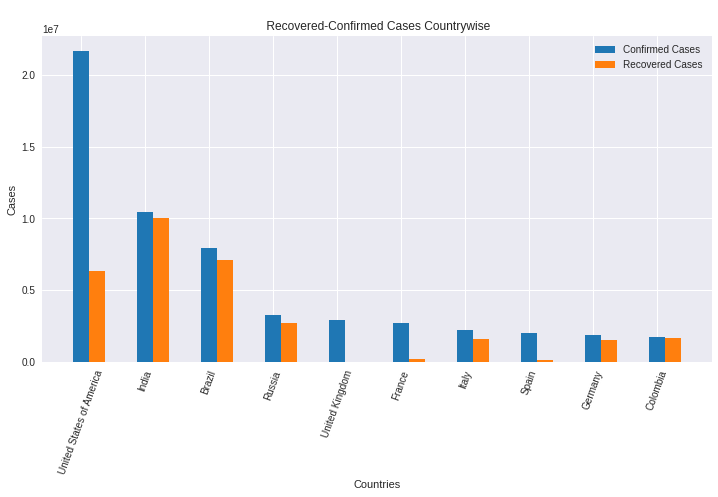

In [ ]:
# PLOTTING: WE ARE PLOTTING BAR PLOT FOR THE COMPARISON
xindices = np.arange(len(top_ten_countries_confirmed_names))
width = 0.25

plt.rcParams["figure.figsize"] = [12,6]
plt.bar(x=xindices, height = top_ten_countries_confirmed_count, width=width, label = 'Confirmed Cases', color = '#1f77b4')
plt.bar(x=xindices+width, height = top_ten_countries_recovered_count, width=width, label = 'Recovered Cases', color = '#ff7f0e')

plt.xticks(ticks=xindices, labels=top_ten_countries_confirmed_names)
plt.xticks(rotation = 70)
plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('\n Recovered-Confirmed Cases Countrywise')
plt.legend()
plt.show()

We can see there is a huge gap between Confirmed Cases and Recovered Cases for countries like United States of America, France, Italy, Spain.

**NOW, WE WILL PERFORM COUNTRY-WISE ANALYSIS.**

### United States of America



Our target variable here is **'Confirmed_New'** i.e. Number of newly reported covid cases on daily basis.

Lets see the distribution of the same variable



 Shape of the dataset for USA: (328, 13)

 Confirmed Cases description for USA 

count       328.000000
mean      65964.728659
std       66409.932330
min           0.000000
25%       24468.750000
50%       42560.500000
75%       68867.250000
85%      157162.500000
90%      189585.600000
100%     302506.000000
max      302506.000000
Name: Confirmed_New, dtype: float64




Text(0.5, 1.0, '\n Confirmed Cases Spread for USA')

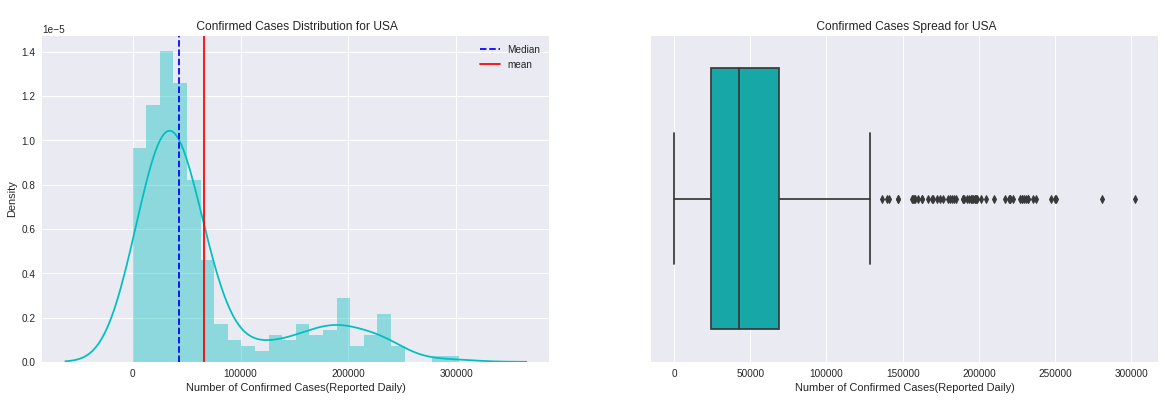

In [ ]:
# USA :
usa_data = govt_response_policies_data[govt_response_policies_data['country_name'] == 'United States of America']
print("\n Shape of the dataset for USA:", usa_data.shape)

print('\n Confirmed Cases description for USA \n')
print(usa_data.Confirmed_New.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))
print('\n')

# Distribution of daily confirmed cases for USA
plt.rcParams["figure.figsize"] = [20,6]

plt.subplot(1,2,1)
sns.distplot(usa_data['Confirmed_New'],color='c')
plt.axvline(np.median(usa_data.Confirmed_New),color='b', linestyle='--', label = 'Median')
plt.axvline(np.mean(usa_data.Confirmed_New),color='r', linestyle='-', label = 'mean')
plt.xlabel('Number of Confirmed Cases(Reported Daily)')
plt.legend()
plt.title('\n Confirmed Cases Distribution for USA')

# Spread of confirmed cases for USA
plt.subplot(1,2,2)
sns.boxplot(usa_data['Confirmed_New'],color='c')
plt.xlabel('Number of Confirmed Cases(Reported Daily)')
plt.title('\n Confirmed Cases Spread for USA')

**Inference :**
1.  Most of the daily reported "Confirmed_New" cases are below 90000. **The distribution is right skewed for the country USA.**
2. The data points are far spread out from the mean, **which indicates high variance in the "Confirmed_Cases"**, (**85% of the cases are below 157162** and **remaining 15% are between 157162 and 302506**)




Daily Confirmed Cases, Recovered Cases and Deaths in USA 
 


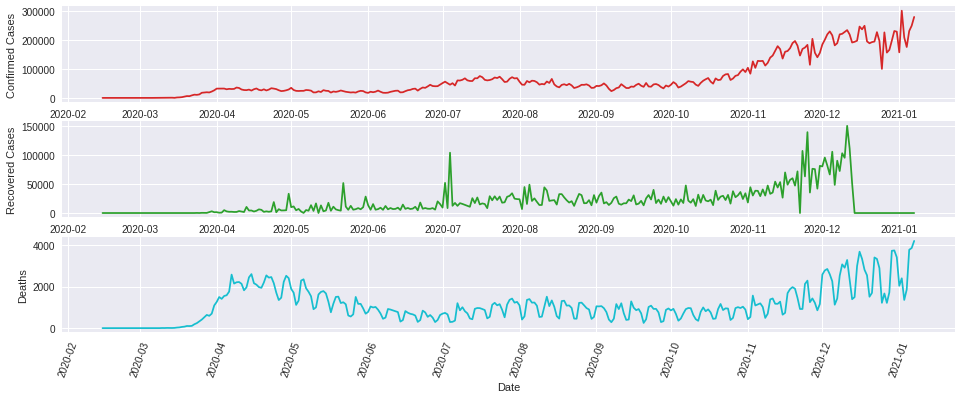

In [ ]:
# Checking "Confirmed Cases","Recovered Cases", "Deaths" for USA
plt.rcParams["figure.figsize"] = [16,6]
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
xlabels = ['2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12', '2021-01']

print('\n')
print('Daily Confirmed Cases, Recovered Cases and Deaths in USA \n ')
ax1.plot(usa_data.date, usa_data['Confirmed_New'], color = '#d62728')
ax1.set_ylabel('Confirmed Cases')

ax2.plot(usa_data.date, usa_data['Recovered_New'], color = '#2ca02c')
ax2.set_ylabel('Recovered Cases')

ax3.plot(usa_data.date, usa_data['Deaths_New'], color = '#17becf')
ax3.set_xlabel('Date')
ax3.set_xticklabels(xlabels,rotation = 70)
ax3.set_ylabel('Deaths')

plt.show()

**Now, We want to explore other variables that is -** 

**Relation between Govt policy variables** ( 'school_closing',
 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings',
 'stay_at_home_requirements', 'international_travel_controls',              'testing_policy', 'stringency_index') **with regards to 'Confirmed_New', 'Recovered_New', 'Deaths_New'**

Now, **Strigency Index is a composite measure based on seven response indicators** including 'school_closing', 'workplace_closing', etc. rescaled to a value from **0 to 100** (100 = strictest). 


Pairplot to see the correlation between Strigency Index and Other Variables


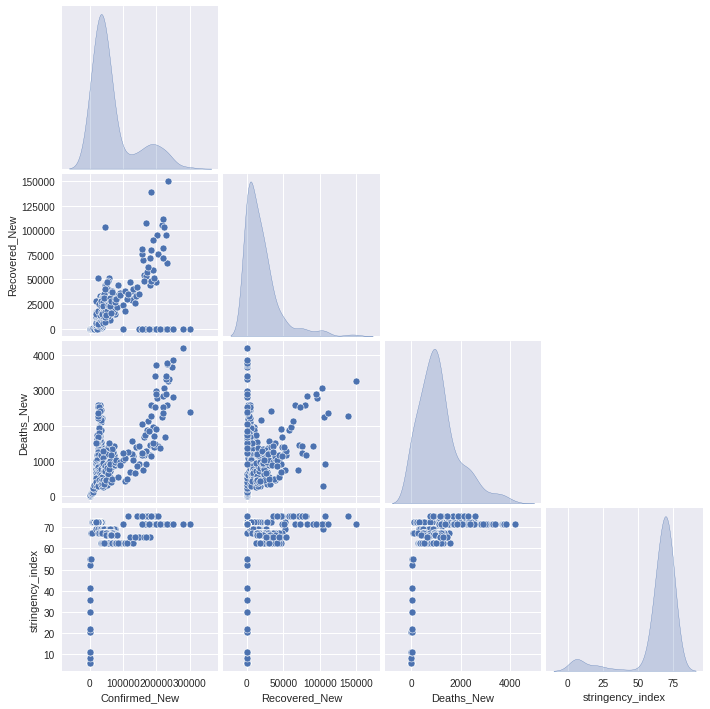

In [ ]:
# Here we can see the relation between 'Confirmed_New', 'Recovered_New', 'Deaths_New', and 'stringency_index'
cols = ['Confirmed_New', 'Recovered_New', 'Deaths_New', 'stringency_index']


print('Pairplot to see the correlation between Strigency Index and Other Variables')

sns.pairplot(usa_data, vars = cols, kind = 'scatter', diag_kind = 'kde', corner = True)
plt.show()

As daily number of Confirmed Cases were increasing, strigency index was also increased.

That means, policies were getting strict as number of infected people were increasing.

**CHECKING MULTICOLLINEARITY**

As Strigency Index is comprised of all the other social factors. And as per our research we want to identify the effects of all these other factors on the spread of pandemic. Then, we would want to check for Multicollinearity.



We will check multicollinearity for features/variables which encodes the information about goverment's response/policies, such as - 
'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'stay_at_home_requirements','international_travel_controls', 'testing_policy', 'stringency_index'


For checking Multicollinearity we are going to use **variance_inflation_factor()** method from statsmodels.

The **variance inflation factor (VIF)** measures the extent of correlation between one predictor and the other predictors in a model.

A value of 1 means that the predictor is not correlated with other variables. The higher the value, the greater the correlation of the variable with other variables.

Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

demo_data = usa_data.drop(['date','country_name','Confirmed_New','Recovered_New','Deaths_New'],axis = 1)

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

vif_index = calc_vif(demo_data)
print(vif_index)

                       variables          VIF
0                 school_closing   160.414649
1              workplace_closing    47.142639
2           cancel_public_events   471.422825
3     restrictions_on_gatherings   175.767594
4      stay_at_home_requirements    22.968691
5  international_travel_controls    47.890725
6                 testing_policy   724.896210
7               stringency_index  1112.441089


The value of VIF is very high for each of the above variables. But we can specifically notice that the value for **stringency_index is the highest amongst others**.

**HEATMAP** to Visualize the correlation between different variables:

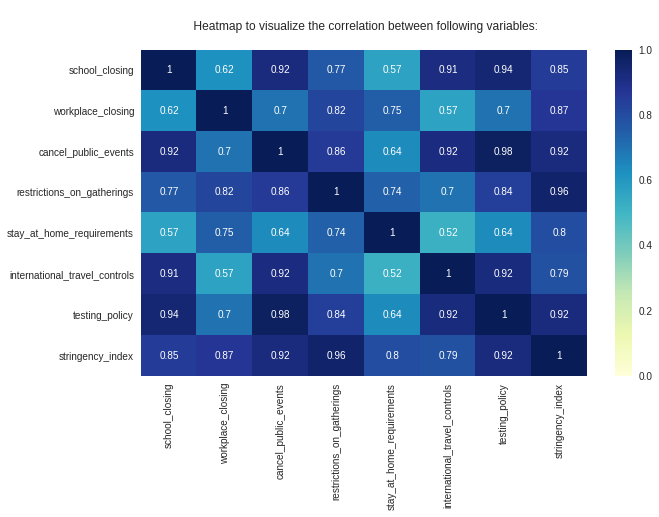

In [ ]:
# We will plot heatmap to actually visualize the correlation:
plt.rcParams["figure.figsize"] = [10,6]
sns.heatmap(demo_data.corr(),vmin=0,vmax =1,annot=True,cmap="YlGnBu");
plt.title('\n Heatmap to visualize the correlation between following variables:\n ')
plt.show()

**Inference -**
1. We can see that the 'Strigency Index' is strongly correlated with all the other variables. So if for example the value of 'restrictions_on_gatherings' increases, value of 'strigency_index' is also going to increase.

2. Also all the other variables are also fairly correlated with each other.

This tells us that there exist a multicollinearity amongst all these variables.



**We would also check correlation between independent and dependent variables.**

                        variables          VIF
0                   Confirmed_New     7.172725
1                   Recovered_New     2.447739
2                      Deaths_New     7.265362
3                  school_closing   162.816952
4               workplace_closing    79.753386
5            cancel_public_events   482.976680
6      restrictions_on_gatherings   212.774327
7       stay_at_home_requirements    25.304667
8   international_travel_controls    51.663472
9                  testing_policy   743.256622
10               stringency_index  1677.485745


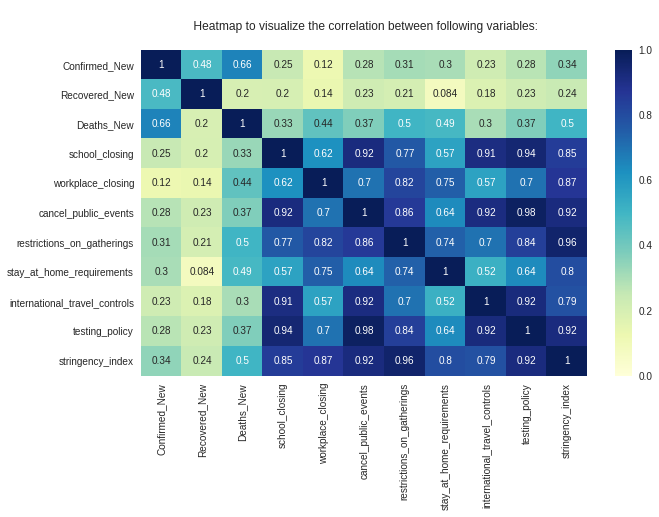

In [ ]:
demo_data = usa_data.drop(columns=['date','country_name'])
vif_index = calc_vif(demo_data)
print(vif_index)


# HEATMAP:
# We will plot heatmap to actually visualize the correlation:
plt.rcParams["figure.figsize"] = [10,6]
sns.heatmap(usa_data.corr(),vmin=0,vmax =1,annot=True,cmap="YlGnBu");
plt.title('\n Heatmap to visualize the correlation between following variables:\n ')
plt.show()


VIF values for dependent variables like 'Confirmed_New', 'Recovered_New' and 'Deaths_New' are pretty low.

**Distribution of Stringency Index for USA**

Text(0.5, 1.0, '\n Strigency Index Distribution for USA')

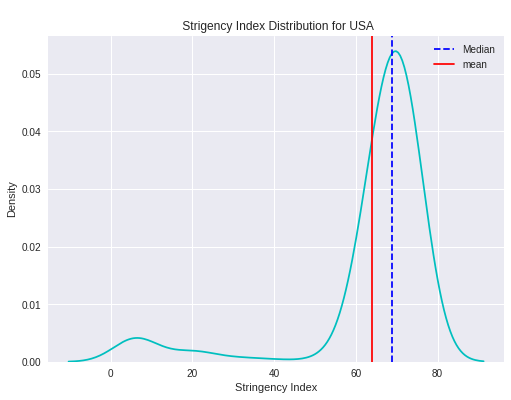

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
plt.subplot(1,2,1)
sns.kdeplot(usa_data['stringency_index'],color='c')
plt.axvline(np.median(usa_data.stringency_index),color='b', linestyle='--', label = 'Median')
plt.axvline(np.mean(usa_data.stringency_index),color='r', linestyle='-', label = 'mean')
plt.xlabel('Stringency Index')
plt.legend()
plt.title('\n Strigency Index Distribution for USA')


**Distribution of other variables for USA**


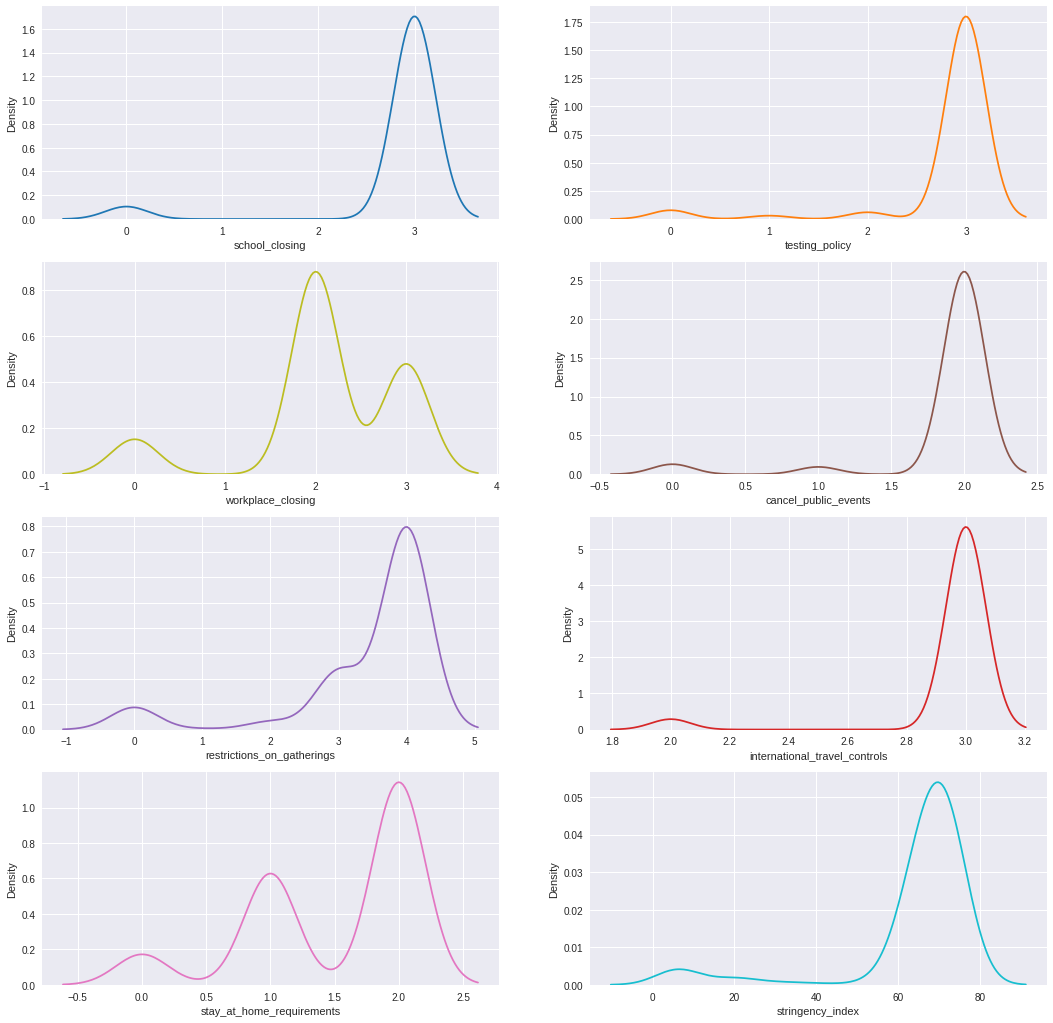

In [ ]:
plt.rcParams["figure.figsize"] = [18,18]
fig, axs = plt.subplots(4, 2)

sns.kdeplot(usa_data['school_closing'], color="#1f77b4", label = 'School_closing', ax=axs[0, 0])
sns.kdeplot(usa_data['testing_policy'], color="#ff7f0e", label = 'Testing Policy', ax=axs[0, 1])

sns.kdeplot(usa_data['workplace_closing'], color="#bcbd22", label = 'Workplace Closing', ax=axs[1, 0] )
sns.kdeplot(usa_data['cancel_public_events'], color="#8c564b", label = 'Cancel Public Events', ax=axs[1, 1])

sns.kdeplot(usa_data['restrictions_on_gatherings'], color="#9467bd", label = 'Restrictions on Gatherings', ax = axs[2, 0])
sns.kdeplot(usa_data['international_travel_controls'], color="#d62728", label = 'International Travel Controls', ax = axs[2, 1])

sns.kdeplot(usa_data['stay_at_home_requirements'], color="#e377c2", label = 'Stay at Home Requirements', ax = axs[3, 0])
sns.kdeplot(usa_data['stringency_index'], color="#17becf", label = 'Stringency Index', ax = axs[3, 1])


So seeing above Density plots, we can say maximum number of days within a year had strict policies.

**Now, we will explore Mobility related features and Weather related features for USA.**

Text(0.5, 1.0, 'Heatmap for correlation between weather related features')

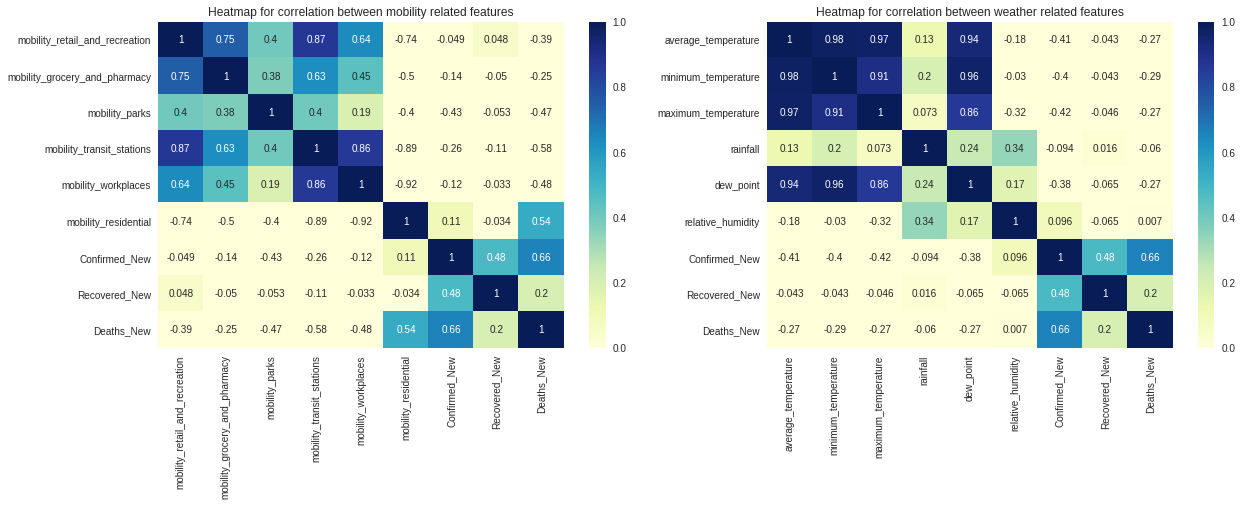

In [ ]:
# We will see the relation between independent and dependent variables for mobility and weather related data.

# MOBILITY DATA
mobility_data_cols = ['date','country_name','mobility_retail_and_recreation',
       'mobility_grocery_and_pharmacy', 'mobility_parks',
       'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential','Confirmed_New','Recovered_New','Deaths_New']
mobility_data = data[mobility_data_cols]
usa_mobility_data = mobility_data[mobility_data['country_name'] == 'United States of America']

# HEATMAP FOR MOBOLITY DATA
plt.rcParams["figure.figsize"] = [20,6]
plt.subplot(1,2,1)
sns.heatmap(usa_mobility_data.corr(),vmin=0,vmax =1,annot=True,cmap="YlGnBu")
plt.title('Heatmap for correlation between mobility related features')

# WEATHER DATA
weather_data_cols = ['date','country_name','average_temperature', 'minimum_temperature',
       'maximum_temperature', 'rainfall', 'dew_point', 'relative_humidity','Confirmed_New','Recovered_New','Deaths_New']
weather_data = data[weather_data_cols]
usa_weather_data = weather_data[weather_data['country_name'] == 'United States of America']

#HEATMAP FOR WEATHER DATA
plt.subplot(1,2,2)
sns.heatmap(usa_weather_data.corr(),vmin=0,vmax =1,annot=True,cmap="YlGnBu")
plt.title('Heatmap for correlation between weather related features')

We see that the values for correlation of dependent variables with mobility variables and with weather variables are very low.

So we can say there is **negligible correlation between dependent and independent variables for mobility data and weather data.**